# An introduction to Linear Regression

In this notebook we explain the theory behind linear regression models, and build them from scratch.

## Outline

- [Section 1](#section-1): Intro to Linear Regression
- [Section 2](#section-2): The Least Squared Loss and Maximum Likelihood
- [Section 3](#section-3): Ridge Regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Initial global configuration for matplotlib - this is useful to have high quality plots, avoiding to set these parameters for each plot
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Section 1: Intro to Linear Regression

A linear regression model looks like $$ y = x^T \beta + \epsilon, ~~ \epsilon \sim \mathcal{N}(0, \sigma^2), $$

where $x \in \mathbb{R}^p$ are the inputs (i.e. a single datapoint with p features), $\beta \in \mathbb{R}^p$ are the parameters and $y \in \mathbb{R}$ is the prediction.

Suppose we have a training set $(x^i, y^i)_{i=1}^{N}$. The training set can be cast into the matrices

$$\boldsymbol X = %\underbrace{
\begin{bmatrix}
x_1^{(1)} & \cdots & x_p^{(1)}  \\
x_1^{(2)} & \cdots & x_p^{(2)}  \\
\vdots & \ddots & \vdots \\
x_1^{(N)} & \cdots & x_p^{(N)}  \\
\end{bmatrix}
%}
_{N\times p} \qquad
\boldsymbol y = %\underbrace{
\begin{bmatrix}
y^{(1)} \\ \vdots \\ y^{(N)}
\end{bmatrix} %}
_{N\times1}$$

For now, we will ignore the parameter $\beta_0$. The optimal parameter $\beta^\star$ corresponding to the training data is defined as 

$$ \beta^\star = \text{arg}\min_\beta \|y - \boldsymbol X \beta\|^2 $$

#### Dataset generation

Let's create a simple dataset.

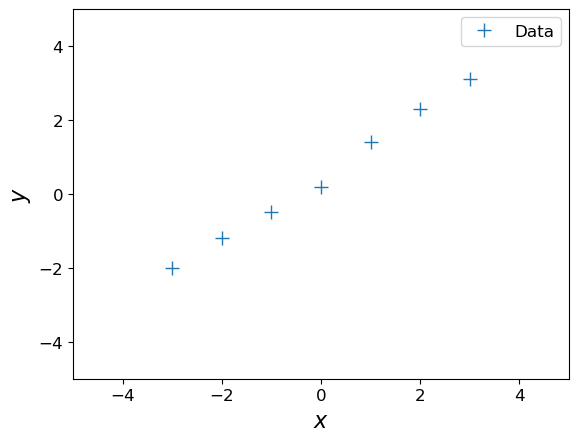

In [4]:
# Defining the training set
"""
NOTE:
We use reshape(-1,1) to turn the array from shape (7,) to (7,1), since most ML libraries 
expect input/output features to be 2D arrays
"""
X = np.array([-3, -2, -1, 0, 1, 2, 3]).reshape(-1,1)
y = np.array([-2, -1.2, -0.5, 0.2, 1.4, 2.3, 3.1]).reshape(-1,1)

# Plot the training set

plt.figure()
plt.plot(X, y, '+', markersize=10, label='Data')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.ylim(-5, 5)
plt.xlim(-5,5)
plt.legend()
plt.show()

## Section 2: Least squares loss and Maximum Likelihood Estimation

A classical computation gives us that the solution to the least squares problem is given by$$ \beta^\star = (X^T X)^{-1}X^T y. $$

The same estimate can be obtained by a maximum likelihood estimation. In other words, if we look for the parameters $\beta^{MLE}$ that maximise 

$$  p(\boldsymbol y | \boldsymbol X, \boldsymbol\beta) = \prod_{i=1}^N p(y^{(i)} | \boldsymbol x^{(i)}, \boldsymbol\beta)\,. $$

then we can prove that 

$$ \beta^{MLE} = \beta^\star = (X^T X)^{-1}X^T y. $$

Let's compute $\beta^\star$ for the given training set.

In [5]:
def MLE(X,y):
    """
    INPUT: X: N x p matrix of training inputs
           y: N x 1 vector of training targets/observations
    OUTPUT: maximum likelihood parameters (p x 1)
    """
    assert X.shape[0] == y.shape[0], "The inputs have different lengths."

    N = X.shape[0]
    p = X.shape[1]

    beta_MLE = np.linalg.inv((X.T @ X)) @ X.T @ y

    return beta_MLE

In [6]:
# Compute the maximum likelihood estimate for our dataset
beta_MLE = MLE(X,y)
print(beta_MLE)

[[0.86428571]]


Next, let's build a function that uses this value of $\beta$ to predict new datapoints.

In [7]:
def predict(X_test, beta):
    assert X_test.shape[1] == beta.shape[0], "X_test and beta have incompatible dimensions."
    return X_test @ beta

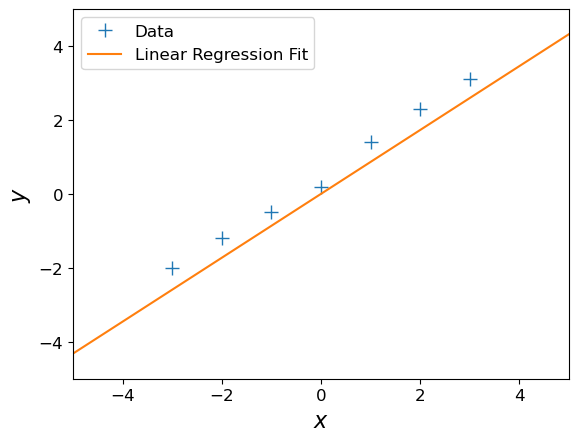

In [13]:
# define a test set
X_test = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict(X_test, beta_MLE)

# plot
plt.figure()
plt.plot(X, y, '+', markersize=10, label='Data')
plt.plot(X_test, ml_prediction, label='Linear Regression Fit')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.ylim(-5, 5)
plt.xlim(-5,5)
plt.legend()
plt.show()

However, notice what happens if we add 2 to our y-values and re-calculate the model.

[[0.86428571]]


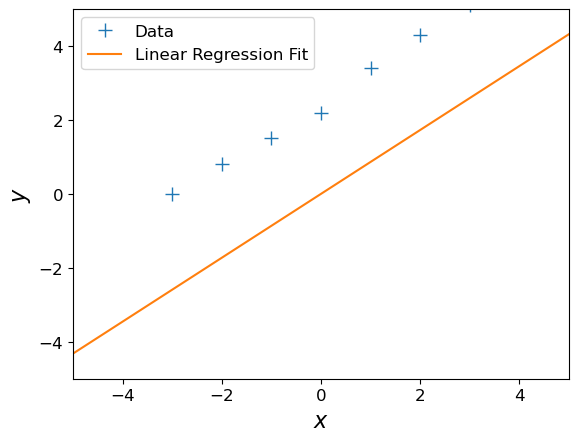

In [15]:
ynew = y + 2.0

# get maximum likelihood estimate
beta_MLE = MLE(X, ynew)
print(beta_MLE)

# define a test set
X_test = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict(X_test, beta_MLE)

# plot
plt.figure()
plt.plot(X, ynew, '+', markersize=10, label='Data')
plt.plot(X_test, ml_prediction, label='Linear Regression Fit')
plt.ylim(-5, 5)
plt.xlim(-5,5)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()

Clearly, the orange line is not a good fit! This is because we assume that our regression line passed through the origin. To overcome this, we can introduce an intercept term. If we now define the inputs to be the augmented vector $\boldsymbol x_{\text{aug}} = \begin{bmatrix}1\\\boldsymbol x\end{bmatrix}$, we can write the new linear regression model as
$$
y = \boldsymbol x_{\text{aug}}^T\boldsymbol\beta_{\text{aug}} + \epsilon\,,\quad \boldsymbol\beta_{\text{aug}} = \begin{bmatrix}
\beta_0\\
\boldsymbol\beta_1
\end{bmatrix}\,.
$$
So we obtain a more general model including an intercept term $\beta_0$. Hence we redefine $\boldsymbol X$ starting from $\boldsymbol x_{\text{aug}}$, obtaining in this the $\boldsymbol X$ used in the lecture notes:
$$
\boldsymbol X = %\underbrace{
\begin{bmatrix}
1 & x_1^{(1)} & \cdots & x_p^{(1)}  \\
1 & x_1^{(2)} & \cdots & x_p^{(2)}  \\
1 & \vdots & \ddots & \vdots \\
1 & x_1^{(N)} & \cdots & x_p^{(N)}  \\
\end{bmatrix}
%}
_{N\times (p+1)}
$$
and we will use this definition of $\boldsymbol X$ from now on.

In [22]:
N, p = X.shape
X_aug = np.hstack([np.ones((N,1)), X]) # augmented training inputs of size N x (p+1)
beta_aug = np.zeros((p+1, 1)) # new beta vector of size (p+1) x 1

Let's now compute the maximum likelihood estimator in this case.

In [25]:
def max_lik_estimate_aug(X_aug, y):
    beta_aug_ml = MLE(X_aug, y) 

    return beta_aug_ml

In [26]:
beta_aug_ml = max_lik_estimate_aug(X_aug, ynew)
beta_aug_ml

array([[2.47142857],
       [0.86428571]])

Notice that there are two parameters - the gradient and the y-intercept. Let's re-run our regression now.

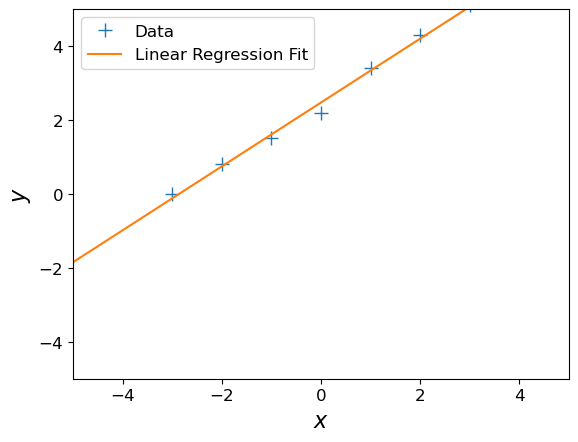

In [28]:
# define a test set (we also need to augment the test inputs with ones)
X_test_aug = np.hstack([np.ones((X_test.shape[0],1)), X_test]) # 100 x (p + 1) vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict(X_test_aug, beta_aug_ml)

# plot
plt.figure()
plt.plot(X, ynew, '+', markersize=10, label='Data')
plt.plot(X_test, ml_prediction, label='Linear Regression Fit')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.legend()
plt.show()

Much better!

<a name="section-3"></a>

## Section 3: Ridge regression

Let's now discuss ridge regression - an extension of linear regression with least squares loss function, including a (usually small) positive penalty term $\lambda$:
$$
\underset{\boldsymbol\beta}{\text{min}} \| \boldsymbol y - \boldsymbol X \boldsymbol\beta \|^2 + \lambda \| \boldsymbol\beta \|^2
$$
The solution is
$$
\boldsymbol\beta^{*}_{\text{ridge}} = (\boldsymbol X^T\boldsymbol X + \lambda I)^{-1}\boldsymbol X^T\boldsymbol y \, .
$$


This time, we will define a very small training set of only two observations to demonstrate the advantages of ridge regression over least squares linear regression.



In [29]:
X_train = np.array([0.5, 1]).reshape(-1,1)
y_train = np.array([0.5, 1])
X_test = np.array([0, 2]).reshape(-1,1)

In [37]:
def ridge_estimate(X, y, penalty):
    assert X.shape[0] == y.shape[0], "X and y don't have the same shape!"

    N, p = X.shape
    X_aug = np.hstack([np.ones((N,1)),X])
    N_aug, p_aug = X_aug.shape
    
    # Shape of X.T @ X is shape of p.aug = (p+1) so I should have the samne shape
    I = np.identity(p_aug)
    
    # We should ignore the first entry of the identity since that corresponds to the bias term
    I[0] = 0.0 
    beta_ridge = np.linalg.inv(X_aug.T @ X_aug + penalty * I) @ X_aug.T @ y

    return beta_ridge

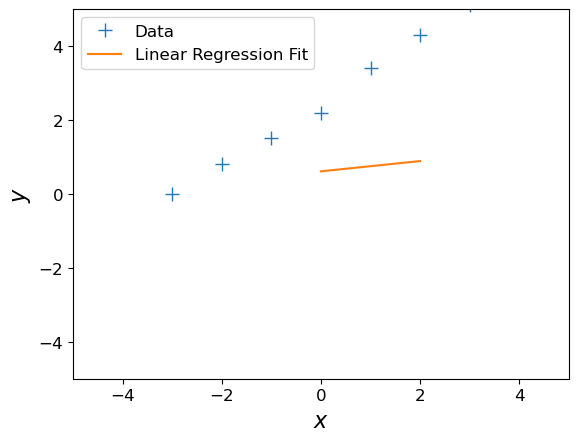

In [46]:
beta_ridge = ridge_estimate(X_train, y_train, penalty=0.1)

# We need to augmnet the X matrix with a column of ones before passing it through the predictor function
X_train_aug = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    
ml_prediction = predict(X_train_aug, beta_ridge)


# plot
plt.figure()
plt.plot(X, ynew, '+', markersize=10, label='Data')
plt.plot(X_test, ml_prediction, label='Linear Regression Fit')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.legend()
plt.show()

Okay, so this example wasn't very illuminating. To see how Ridge regression can be useful, let's take an example of some noisy data where classical OLS is prone to overfitting, and see how Ridge regression compares. We approximate a curve y = sin(x) by a number of noisy datapoints below, and run OLS alongside Ridge regression. 

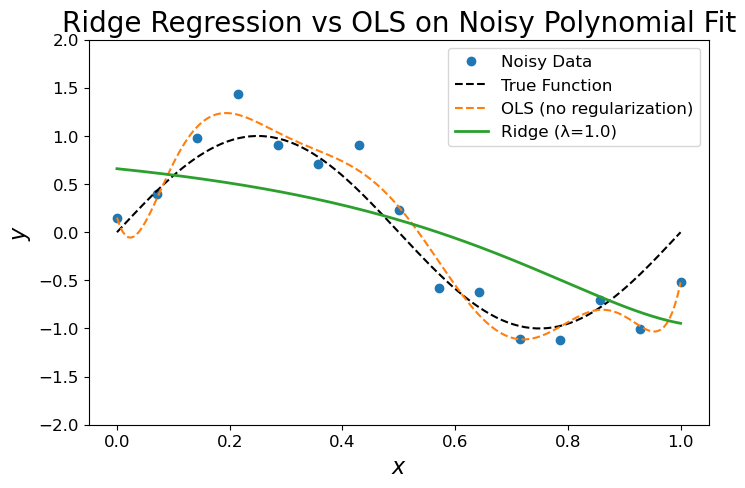

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate true function
def true_function(x):
    return np.sin(2 * np.pi * x)

# Training data
n_samples = 15
X = np.linspace(0, 1, n_samples)
y = true_function(X) + np.random.normal(0, 0.3, size=n_samples)  # noisy targets

# Reshape for sklearn-style matrix
X = X[:, None]

# Create polynomial features (degree 9)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=9, include_bias=False)
X_poly = poly.fit_transform(X)

# Ridge regression
beta_ridge = ridge_estimate(X_poly, y, penalty=1.0)

# Prediction grid
X_test = np.linspace(0, 1, 200)[:, None]
X_test_poly = poly.transform(X_test)
X_test_aug = np.hstack([np.ones((X_test.shape[0], 1)), X_test_poly])
y_pred_ridge = predict(X_test_aug, beta_ridge)

# OOLS for comparison
beta_ols = ridge_estimate(X_poly, y, penalty=0.0)
X_test_aug_ols = np.hstack([np.ones((X_test.shape[0], 1)), X_test_poly])
y_pred_ols = predict(X_test_aug_ols, beta_ols)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(X, y, 'o', label='Noisy Data')
plt.plot(X_test, true_function(X_test), 'k--', label='True Function')
plt.plot(X_test, y_pred_ols, label='OLS (no regularization)', linestyle='dashed')
plt.plot(X_test, y_pred_ridge, label='Ridge (λ=1.0)', linewidth=2)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Ridge Regression vs OLS on Noisy Polynomial Fit")
plt.ylim(-2, 2)
plt.show()


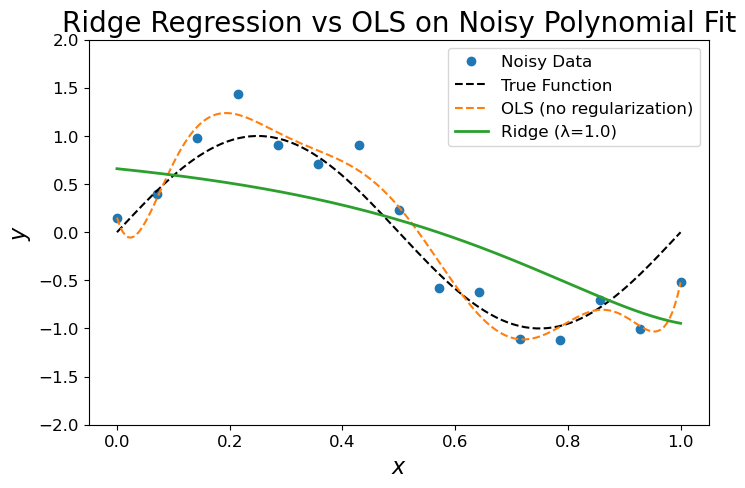

In [48]:
# Set seed for reproducibility
np.random.seed(42)

# Generate true function
def true_function(x):
    return np.sin(2 * np.pi * x)

# Training data
n_samples = 15
X = np.linspace(0, 1, n_samples)
y = true_function(X) + np.random.normal(0, 0.3, size=n_samples)  # noisy targets

# Reshape for sklearn-style matrix
X = X[:, None]

# Create polynomial features (degree 9)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=9, include_bias=False)
X_poly = poly.fit_transform(X)

# Ridge regression
beta_ridge = ridge_estimate(X_poly, y, penalty=1.0)

# Prediction grid
X_test = np.linspace(0, 1, 200)[:, None]
X_test_poly = poly.transform(X_test)
X_test_aug = np.hstack([np.ones((X_test.shape[0], 1)), X_test_poly])
y_pred_ridge = predict(X_test_aug, beta_ridge)

# OLS for comparison
beta_ols = ridge_estimate(X_poly, y, penalty=0.0)
X_test_aug_ols = np.hstack([np.ones((X_test.shape[0], 1)), X_test_poly])
y_pred_ols = predict(X_test_aug_ols, beta_ols)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(X, y, 'o', label='Noisy Data')
plt.plot(X_test, true_function(X_test), 'k--', label='True Function')
plt.plot(X_test, y_pred_ols, label='OLS (no regularization)', linestyle='dashed')
plt.plot(X_test, y_pred_ridge, label='Ridge (λ=1.0)', linewidth=2)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Ridge Regression vs OLS on Noisy Polynomial Fit")
plt.ylim(-2, 2)
plt.show()
